In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
tweetdataset=pd.read_csv(r"C:\Users\Ramyadeepa\Documents\Emotion Analysis Project\tweetdataset.csv")

In [4]:
tweetdataset.head()

,id,emotion,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [5]:
tweetdataset.shape

(40000, 4)

In [6]:
tweetdataset.emotion.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: emotion, dtype: int64

In [7]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])
plot_size[0] = 8
plot_size[1] = 50
plt.rcParams["figure.figsize"] = plot_size

6.0
4.0


Text(0, 0.5, 'No. of Tweets')

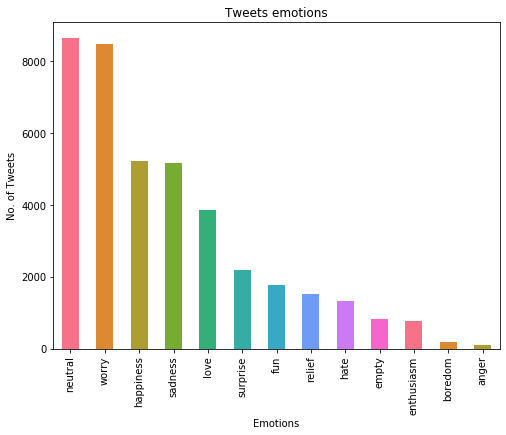

In [8]:
import seaborn as sns
color=sns.color_palette("husl", 10)
pd.Series(tweetdataset["emotion"]).value_counts().plot(kind = "bar",
                        color=color,figsize=(8,6),title = "Tweets emotions")
plt.xlabel('Emotions', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

In [9]:
features = tweetdataset.iloc[:, 3].values
labels = tweetdataset.iloc[:, 2].values

In [10]:
features

array(['@tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[',
       'Layin n bed with a headache  ughhhh...waitin on your call...',
       'Funeral ceremony...gloomy friday...', ...,
       "Happy Mother's Day to all the mommies out there, be you woman or man as long as you're 'momma' to someone this is your day!",
       '@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEEP OUT MY NEW HIT SINGLES WWW.MYSPACE.COM/IPSOHOT I DEF. WAT U IN THE VIDEO!!',
       '@mopedronin bullet train from tokyo    the gf and i have been visiting japan since thursday  vacation/sightseeing    gaijin godzilla'],
      dtype=object)

In [11]:
labels

array(['xoshayzers', 'wannamama', 'coolfunky', ..., 'JenniRox',
       'ipdaman1', 'Alpharalpha'], dtype=object)

In [12]:
processed_features = []
for sentence in range(0, len(features)):
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)
    processed_feature = re.sub(r'^b\s+', '', processed_feature)
    processed_feature = processed_feature.lower()
    processed_features.append(processed_feature)

In [13]:
processed_features

[' tiffanylue know was listenin to bad habit earlier and started freakin at his part ',
 'layin bed with headache ughhhh waitin on your call ',
 'funeral ceremony gloomy friday ',
 'wants to hang out with friends soon ',
 ' dannycastillo we want to trade with someone who has houston tickets but no one will ',
 're pinging ghostridah14 why didn you go to prom bc my bf didn like my friends',
 'i should be sleep but im not thinking about an old friend who want but he married now damn amp he wants me 2 scandalous ',
 'hmmm http www djhero com is down',
 ' charviray charlene my love miss you',
 ' kelcouch m sorry at least it friday ',
 'cant fall asleep',
 'choked on her retainers',
 'ugh have to beat this stupid song to get to the next rude ',
 ' brodyjenner if watch the hills in london will realise what tourture it is because were weeks and weeks late just watch itonlinelol',
 'got the news',
 'the storm is here and the electricity is gone',
 ' annarosekerr agreed',
 'so sleepy again and 

In [14]:
!pip install sklearn

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(processed_features, tweetdataset.emotion, 
                                                        test_size = 0.1, random_state = 225)
print('X_train :', len(X_train))
print('X_test  :', len(X_test))
print('Y_train :', len(Y_train))
print('Y_test  :', len(Y_test))

X_train : 36000
X_test  : 4000
Y_train : 36000
Y_test  : 4000


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
a = TfidfVectorizer()
b = LogisticRegression(solver = "lbfgs")

In [17]:
from sklearn.pipeline import Pipeline
model = Pipeline([('vectorizer',a),('classifier',b)])
model.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, inter

In [18]:
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test)
confusion_matrix(predictions, Y_test)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   2,   3,   0,   3,   1,   0,   2,   0,   6],
       [  0,   0,   5,  16,  31, 212,   6,  85,  82,  30,  20,  23,  51],
       [  0,   0,   0,   0,   0,   0,  20,   1,   1,   0,  10,   0,   6],
       [  0,   1,   5,   3,   6,  47,   2, 164,  26,   9,  15,  17,  16],
       [  5,   8,  46,  40,  54, 143,  33,  81, 470,  42, 106,  78, 212],
       [  0,   0,   0,   0,   1,   3,   0,   0,   4,   5,   0,   2,   0],
       [  0,   2,   5,   6,   9,  14,  20,  23,  40,  12, 143,  14,  97],
       [  0,   0,   0,   0,   1,   5,   0,   3,   2,   0,   2,   5,   3],
       [ 10,   8,  33,  32,  39,  99,  60,  61, 231,  41, 215,  81, 424]],
      dtype=int64)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

[[  0   0   0   0   0   0   0   0   5   0   0   0  10]
 [  0   0   0   0   0   0   0   1   8   0   2   0   8]
 [  0   0   0   0   0   5   0   5  46   0   5   0  33]
 [  0   0   0   0   0  16   0   3  40   0   6   0  32]
 [  0   0   0   0   2  31   0   6  54   1   9   1  39]
 [  0   0   0   0   3 212   0  47 143   3  14   5  99]
 [  0   0   0   0   0   6  20   2  33   0  20   0  60]
 [  0   0   0   0   3  85   1 164  81   0  23   3  61]
 [  0   0   0   0   1  82   1  26 470   4  40   2 231]
 [  0   0   0   0   0  30   0   9  42   5  12   0  41]
 [  0   0   0   0   2  20  10  15 106   0 143   2 215]
 [  0   0   0   0   0  23   0  17  78   2  14   5  81]
 [  0   0   0   0   6  51   6  16 212   0  97   3 424]]
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        15
     boredom       0.00      0.00      0.00        19
       empty       0.00      0.00      0.00        94
  enthusiasm       0.00      0.00      0.00        97
         fun 

In [20]:
tweet1 = ["I'm so happy today!"]
result = model.predict(tweet1)
print(result)

['happiness']


In [21]:
tweet2 = ["I don't like it."]
result = model.predict(tweet2)
print(result)

['worry']


In [22]:
tweet3 = ["The sound of rain always puts me to sleep."]
result = model.predict(tweet3)
print(result)

['neutral']


In [23]:
tweet4 = ["You made me cry"]
result = model.predict(tweet4)
print(result)

['sadness']


In [24]:
tweet5 = ["I hate doing this really!"]
result = model.predict(tweet5)
print(result)

['hate']


In [25]:
tweet6 = ["Oh my god, I like you!"]
result = model.predict(tweet6)
print(result)

['love']
